In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

2023-09-12 18:28:42.893532: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-12 18:28:43.172991: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-12 18:28:43.238413: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-12 18:28:43.238446: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 19s 2us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

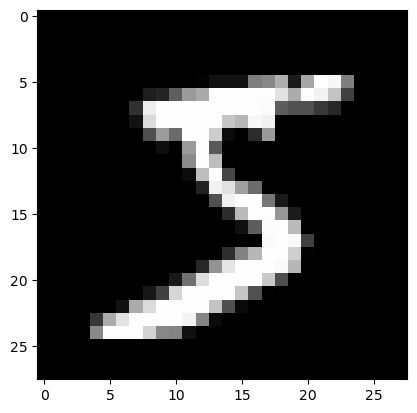

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

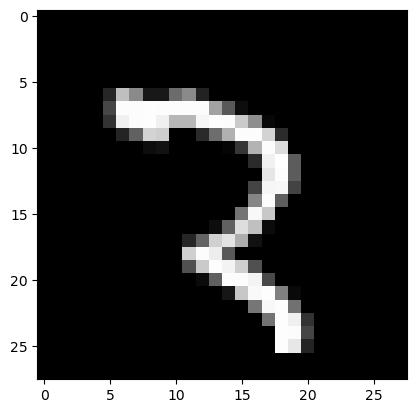

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [21]:
model = keras.Sequential()
model.add (layers. Input (shape=(28,28,1)))
model.add (layers.Conv2D (filters=32, kernel_size=(3,3), activation='relu')) 
model.add (layers.MaxPool2D (pool_size=(2,2)))
model.add (layers. Flatten())
model.add (layers.Dense (32, activation='relu'))
model.add (layers.Dense (10, activation='softmax'))

2023-09-12 18:29:11.437311: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-09-12 18:29:11.437735: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-09-12 18:29:11.437787: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sec-HP-250-15-6-inch-G9-Notebook-PC): /proc/driver/nvidia/version does not exist
2023-09-12 18:29:11.438050: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
__________________________________________________

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [24]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 14s 14ms/step - loss: 0.2523 - accuracy: 0.9280 - val_loss: 0.0992 - val_accuracy: 0.9684
Epoch 2/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0888 - accuracy: 0.9738 - val_loss: 0.0700 - val_accuracy: 0.9779
Epoch 3/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0636 - accuracy: 0.9808 - val_loss: 0.0567 - val_accuracy: 0.9806
Epoch 4/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0502 - accuracy: 0.9852 - val_loss: 0.0570 - val_accuracy: 0.9805
Epoch 5/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0401 - accuracy: 0.9882 - val_loss: 0.0577 - val_accuracy: 0.9812


In [25]:
metrics = pd.DataFrame(model.history.history)

In [26]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.252260,0.928000,0.099182,0.9684
1,0.088790,0.973833,0.070010,0.9779
2,0.063605,0.980767,0.056662,0.9806
3,0.050186,0.985200,0.056950,0.9805
4,0.040141,0.988217,0.057718,0.9812


<AxesSubplot:>

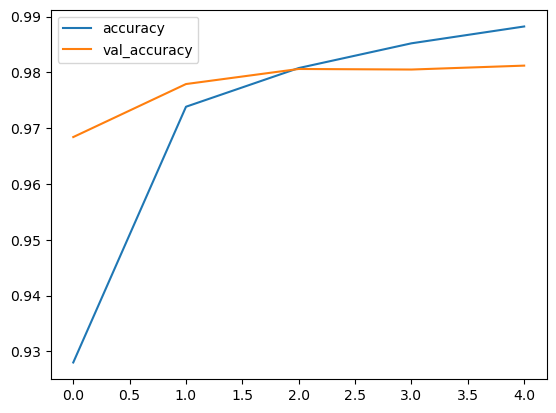

In [27]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

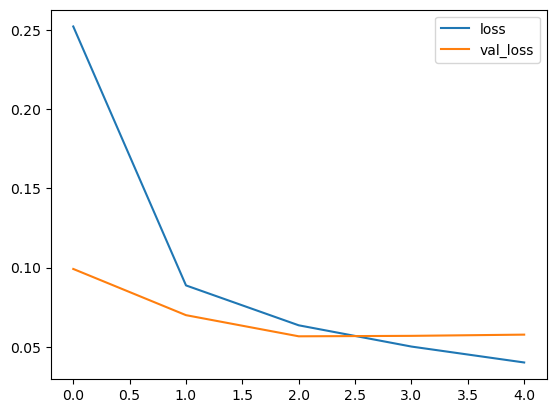

In [28]:
metrics[['loss','val_loss']].plot()

In [29]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 1s 4ms/step


In [30]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 969    0    2    0    0    3    3    1    0    2]
 [   0 1128    2    2    0    0    3    0    0    0]
 [   1    2 1014    5    4    0    1    3    1    1]
 [   0    0    0 1007    0    1    0    0    2    0]
 [   1    1    3    0  967    0    0    0    1    9]
 [   1    0    0   10    0  878    2    0    1    0]
 [   7    2    0    0    5    4  938    0    2    0]
 [   0    3   17    4    0    0    0 1002    2    0]
 [   6    0    9   10    3    4    2    3  933    4]
 [   1    4    0    6    8    6    0    7    1  976]]


In [31]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      1.00      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.96      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Prediction for a single input**



In [12]:
img = image.load_img('/home/sec/mnist-classification/images/imagefive.png')

NameError: name 'image' is not defined

In [13]:
type(img)

NameError: name 'img' is not defined

In [ ]:
img = image.load_img('/home/sec/mnist-classification/images/imagefive.png)
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

In [ ]:
print(x_single_prediction)

In [14]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

NameError: name 'plt' is not defined

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

In [ ]:
print(x_single_prediction)